In [1]:
import pandas as pd

# Create sample dataset
data = {
    'Hours_Studied': [2, 5, 1, 7, 3, 4, 6, 8, 2, 5],
    'Attendance': [60, 80, 50, 90, 65, 75, 85, 95, 55, 70],
    'Previous_Score': [45, 70, 40, 85, 50, 65, 80, 90, 35, 68],
    'Sleep_Hours': [6, 7, 5, 8, 6, 6, 7, 9, 5, 6],
    'Internet_Usage': [4, 2, 6, 1, 5, 3, 2, 1, 7, 3],
    'Result': ['Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Show the data
df


,Hours_Studied,Attendance,Previous_Score,Sleep_Hours,Internet_Usage,Result
0,2,60,45,6,4,Fail
1,5,80,70,7,2,Pass
2,1,50,40,5,6,Fail
3,7,90,85,8,1,Pass
4,3,65,50,6,5,Fail
5,4,75,65,6,3,Pass
6,6,85,80,7,2,Pass
7,8,95,90,9,1,Pass
8,2,55,35,5,7,Fail
9,5,70,68,6,3,Pass


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode the 'Result' column to numeric: Pass=1, Fail=0
le = LabelEncoder()
df['Result'] = le.fit_transform(df['Result'])

# Split features (X) and target (y)
X = df.drop('Result', axis=1)
y = df['Result']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 8
Testing samples: 2


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


In [4]:
!pip install seaborn


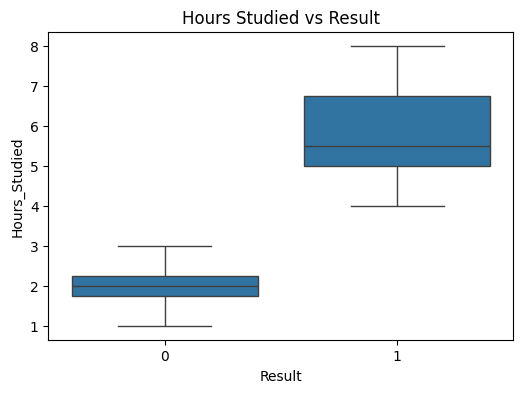

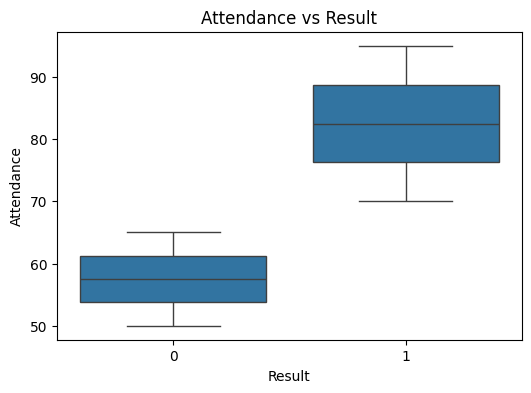

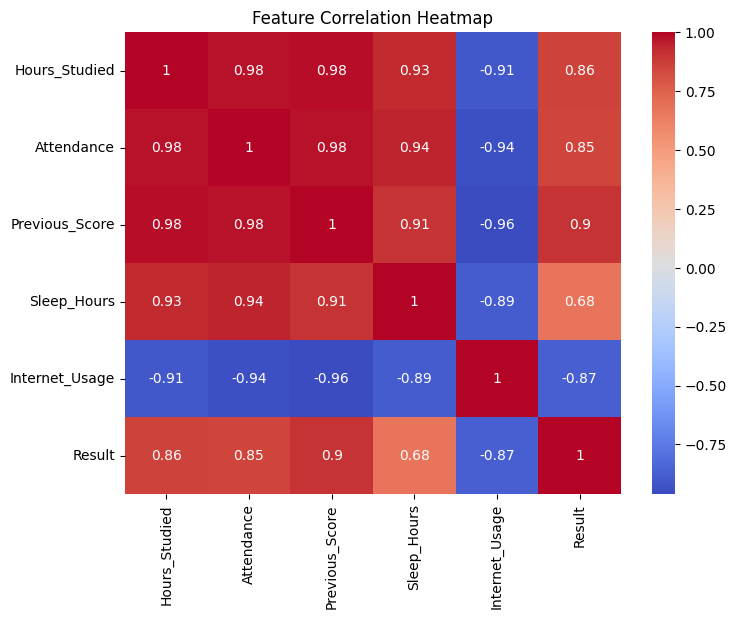

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot: Hours Studied vs Result
plt.figure(figsize=(6,4))
sns.boxplot(x='Result', y='Hours_Studied', data=df)
plt.title("Hours Studied vs Result")
plt.show()

# Plot: Attendance vs Result
plt.figure(figsize=(6,4))
sns.boxplot(x='Result', y='Attendance', data=df)
plt.title("Attendance vs Result")
plt.show()

# Heatmap to show correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()
